# Exploratory data analysis on Haberman dataset from kaggle

In [57]:
#import all the required libraries and also load the dataet using pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

hb = pd.read_csv("haberman.csv")

In [58]:
#Check for the rows and columns available in the dataset
print (hb.shape)

(306, 4)


In [59]:
#Check for the indexing number of the dataset
print(hb.index)

RangeIndex(start=0, stop=306, step=1)


In [60]:
#print the name of columns in dataset
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [61]:
hb["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

* Observations:
* Total of 225 patients have survived for more then 5 years after operation and a total of 81 patients not survived.

In [62]:
#check for basic information about the dataset
hb.info

<bound method DataFrame.info of      age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
7     34    59      0       2
8     34    66      9       2
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
24    38    69     21       2
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62      3       1
29    38    64      1       1
..   ...   ...    ...     ...
276   67

* Observations:
1. first column shows the age of patients operated
2. second column shows the year in which the patients are operated
3. third column shows the total number of nodes found in patients operated
4. fourth column shows the status of patients where numeric 1 shows that the patient survived for more then 5 years after operation and numeric 2 shows that patients didn't survived more then 5 years

In [63]:
#check for basic information about the dataset
hb.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [64]:
survived=hb.loc[hb["status"]==1] 
not_survived=hb.loc[hb["status"]==2]

In [65]:
#basic informaton about the patients not survived
print ("Basic data about patients who survived")
survived.describe()

Basic data about patients who survived


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [66]:
#basic informaton about the patients not survived
print ("Basic data about patients not survived")
not_survived.describe()

Basic data about patients not survived


,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# 2-D Scatter Plot

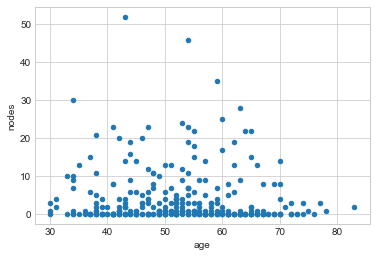

In [67]:
#plot a 2-D scatter plot
hb.plot(kind="scatter",x="age",y="nodes");
plt.show()

Observations:
From above graph its hard to predict any information and analyze any results

# 2-D scatter plot using colour code

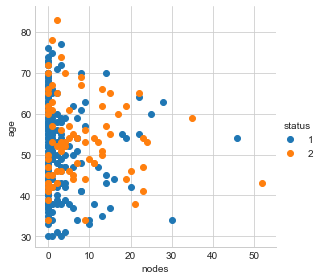

In [68]:
#plot a 2-D scatter plot using colour code
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4)\
   .map(plt.scatter, "nodes", "age")\
   .add_legend();
plt.show();

Observations:

Using number of nodes and age as attributes it's hard to predict the status of patients.

# Pair - Plot

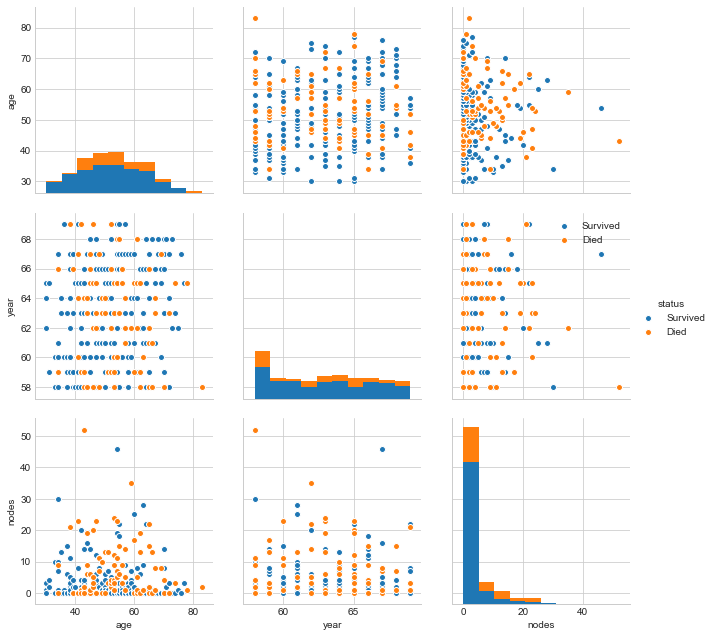

In [69]:
# plot a pair plot of the dataset
#plt.close();
#sns.set_style("whitegrid");
#sns.pairplot(hb, hue = "status", size=3);
#plt.legend();
#plt.show()

plt.close();
hb["status"] = hb["status"].apply(lambda x: "Survived" if x == 1 else "Died")
sns.set_style("whitegrid");
sns.pairplot(hb , hue="status", size=3);
plt.legend();
plt.show();

Observations:
    No attributes except age is much useful in predicting the chances of patients to live more then 5 years after operation.
    from above graph it canb be said that people with less then 40 years of age have higher chances of living after 5 years of operation
    No. of nodes is not dependent on patients age

# Histogram:

# Histogram with attribute as Age.

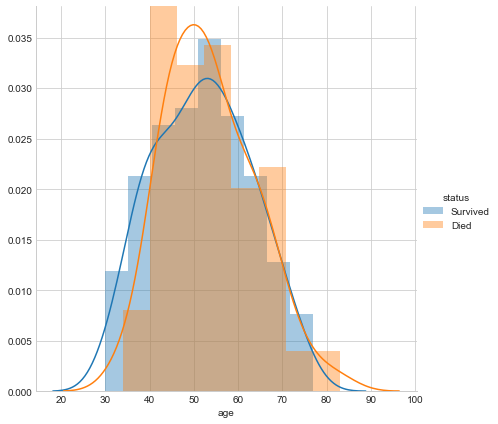

In [70]:
#plotting histogram with attribute as age
sns.FacetGrid(hb, hue="status", size=6).map(sns.distplot, "age").add_legend();
plt.show();

* Observations:

More people have survived with age less then 40 years.
Graph is overlapping with each other it's hard to make correct prediction of data using age as attribute

# Histogram with attribute as Year.

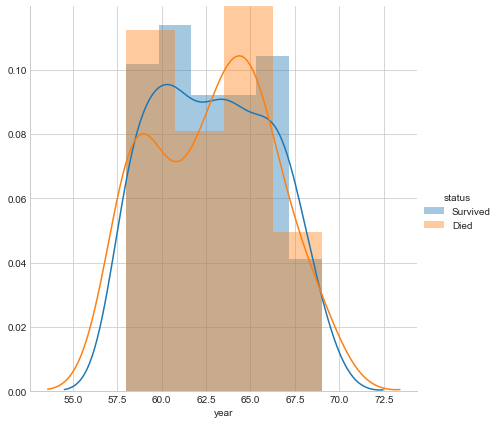

In [71]:
#plotting histogram with attribute as year
sns.FacetGrid(hb, hue="status", size=6).map(sns.distplot, "year").add_legend();
plt.show();

* Observations:
There is not effect of year in which patients are operated on the number of patients survived

# Histogram with attribute as Nodes

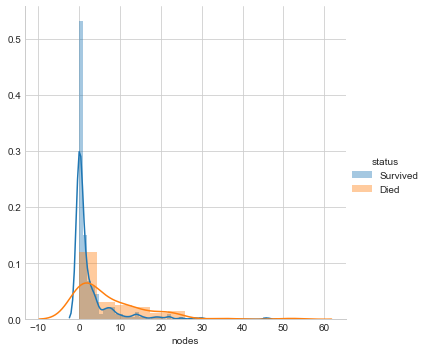

In [72]:
#plotting histogram with attribute as nodes
sns.FacetGrid(hb, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
plt.show();

* Observations:
From above graph it can be observed that the chances of survival is more for the people having zero nodes.

# PDF and CDF of patients survived.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


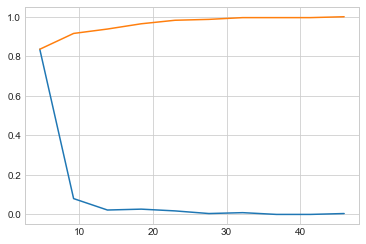

In [73]:
#plot PDF and CDF of the patients survived
counts, bin_edges = np.histogram(survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

* Observations:

From Above graph it is observed that around 91 percent of people survived had less then 10 nodes at the time of operation

# PDF and CDF of patients not survived.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


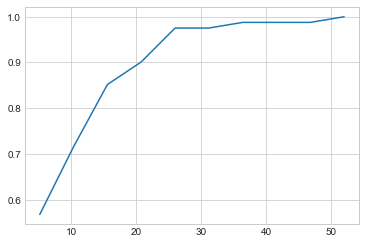

In [74]:
#plotting PDF and CDF of patients not survived
counts, bin_edges = np.histogram(not_survived['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

* Observations:

From above graph it can be observed that total 90 percent of people not survived after operation had less then 20 nodes

# Mean and std-deviation

In [41]:
#print mean of patients survived and patients not survived
print("Mean")
print(np.mean(survived["nodes"]))
print(np.mean(not_survived["nodes"]))

Mean
2.7911111111111113
7.45679012345679


* Observations:

From mean it is observed that the number of nodes in survived patients is less then the number of nodes present in not survived patients

In [42]:
#print std-deviation of patients survived and patients not survived
print("Std-Dev")
print(np.std(survived["nodes"]))
print(np.std(not_survived["nodes"]))

Std-Dev
5.857258449412131
9.128776076761632


* Observations:

From std deviation it can be observed that nodes of patients not survived is spread wide compared to nodes of patients survived

# Medians, Quantiles, 90th percentile, Median absolute deviation.

In [43]:
#print medians, quantiles, 90th percentile, Median absolute deviation
print("medians:")
print(np.median(survived["nodes"]))
print(np.median(not_survived["nodes"]))


print("\nQuantiles:")
print(np.percentile(survived["nodes"], np.arange(0, 100, 25)))
print(np.percentile(not_survived["nodes"], np.arange(0, 100, 25)))

print("\n90th percentile")
print(np.percentile(survived["nodes"],90))
print(np.percentile(not_survived["nodes"],90))

from statsmodels import robust
print("\nMedian absolute deviation")
print(robust.mad(survived["nodes"]))
print(robust.mad(not_survived["nodes"]))

medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile
8.0
20.0

Median absolute deviation
0.0
5.930408874022408


* Observations:

From above values it is observed that total of 75 percent patients who survived after operation had less then or equal to 3 nodes. and 90 percent of the times the number of nodes in patients who survived is less then 8 nodes.

# Box Plot and whiskers

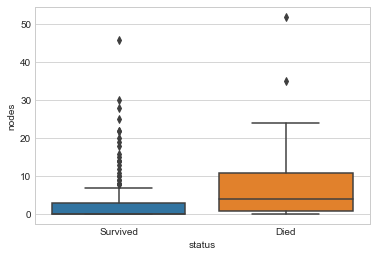

In [76]:
#plotting box plots and whiskers
sns.boxplot(x="status",y="nodes", data=hb)
plt.show()

# Violin plot with attribute as nodes

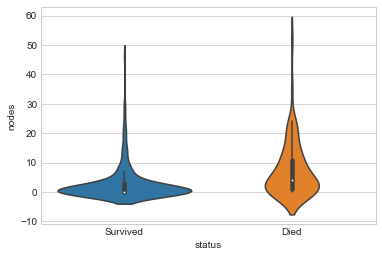

In [77]:
#plotting violin plot with attribute as node
sns.violinplot(x="status",y="nodes",data=hb)
plt.show()

# Violin plots with attribute as Age.

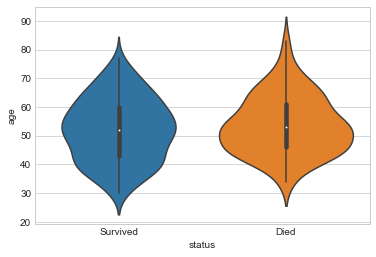

In [78]:
#plotting violin plots with attribute as age
sns.violinplot(x="status",y="age",data=hb)
plt.show()

* Observations:

From above violin plot it can be observed that the number of people survived after operation is more when the number of nodes is zero or close to zero.

# Contour Plot

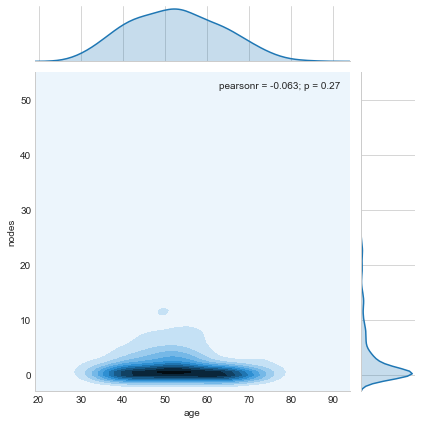

In [79]:
#plotting contour plot
sns.jointplot(x="age", y="nodes", data=hb, kind="kde");
plt.show();

# Conclusion

Following are the observations after Exploratory data analysis of the given haberman dataset containing details of patients undergone operations:

1. Year in which the operation took place is not the deciding factor whether a patient will survive after 5 years or not.

2. age is also not the correct parameter to decide whether a patient operated will survive or not.

3. The number of nodes present is at some level gives an insight about the chances of survival of patient after 5 years. it has been observed that if the number of nodes is zero or close to zero the chances of survival for the patient becomes high. the more the number of nodes present the more the chance that the patient will not survive after 5 years.